<a href="https://colab.research.google.com/github/mcmathiesen/super-potato/blob/main/16_4Mathiesen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

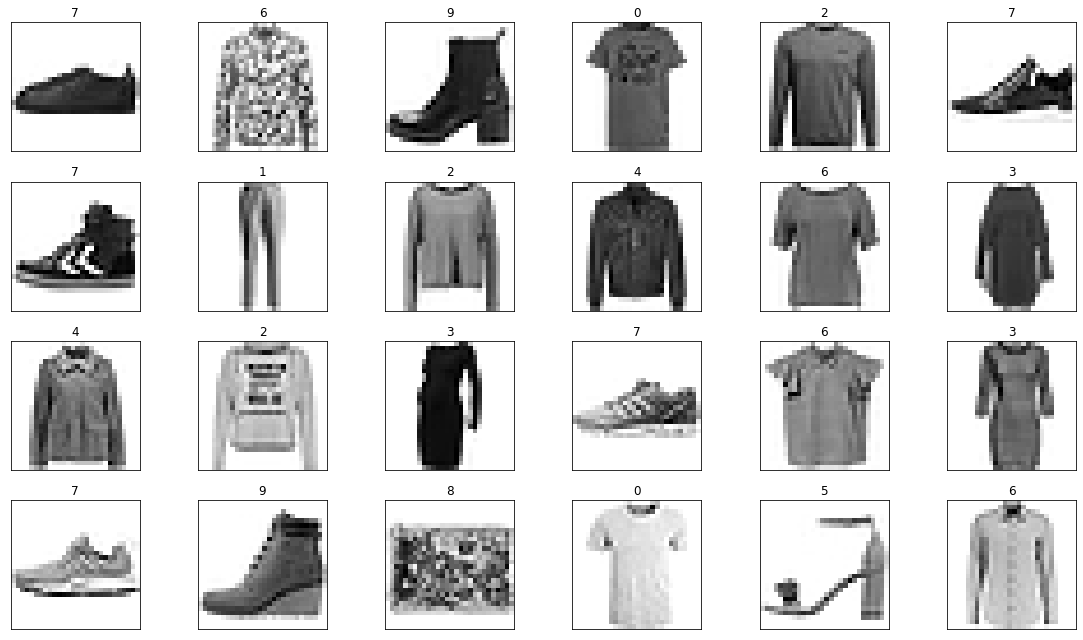

In [10]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

In [11]:
X_train = X_train.reshape((60000, 28, 28, 1))  #reshaping data (width, height, channels)

In [12]:
X_train.shape

(60000, 28, 28, 1)

In [13]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [14]:
X_test.shape

(10000, 28, 28, 1)

In [15]:
X_train = X_train.astype('float32') / 255  #normalizing data

In [16]:
X_test = X_test.astype('float32') / 255

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train = to_categorical(y_train)  #One-hot encoding

In [19]:
y_train.shape

(60000, 10)

In [20]:
y_train[0]  #an example to show one-hot worked

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [21]:
y_test = to_categorical(y_test)

In [22]:
y_test.shape

(10000, 10)

In [23]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [24]:
from tensorflow.keras import Sequential

In [25]:
cnn = Sequential()  #creating sequential model

In [26]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D 

In [27]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))
#implementing the convolution layer
#specifying input shape (28, 28, 1) because this is the first layer

In [28]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))
#adding a pooling layer

In [29]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
#another convolution layer (no size necessary this time)

In [30]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))
#adding another pooling layer

In [31]:
cnn.add(Flatten())  #flattening the results

In [32]:
cnn.add(Dense(units=4096, activation='relu'))

In [33]:
#cnn.add(Dense(units=128, activation='relu'))

In [34]:
cnn.add(Dense(units=10, activation='softmax'))
#softmax converts values to classification probablilities

In [35]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 4096)              13111296  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                4

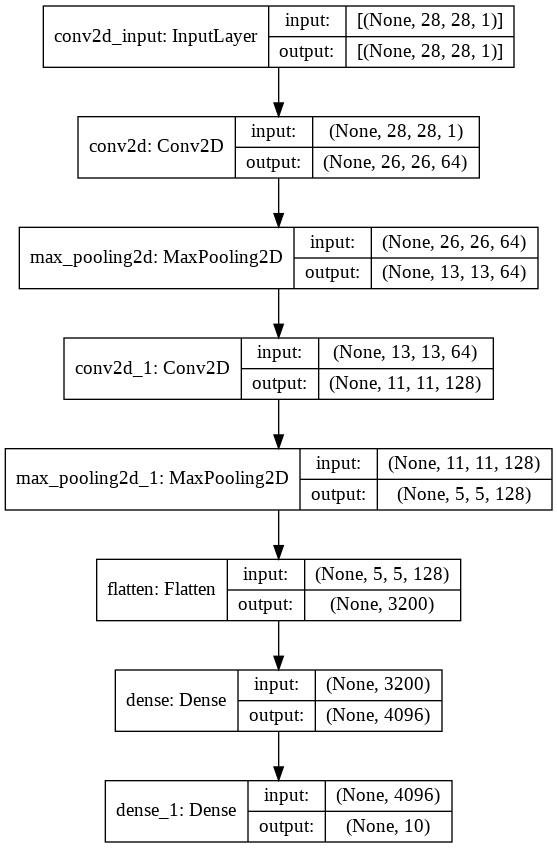

In [36]:
#visualizing model structure
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png')  # display resulting image in notebook

In [37]:
#compiling the model
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [38]:
#training the model
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 244s 289ms/step - loss: 0.4142 - accuracy: 0.8478 - val_loss: 0.2997 - val_accuracy: 0.8887
Epoch 2/5
844/844 [==============================] - 244s 289ms/step - loss: 0.2660 - accuracy: 0.9014 - val_loss: 0.2679 - val_accuracy: 0.8948
Epoch 3/5
844/844 [==============================] - 244s 289ms/step - loss: 0.2176 - accuracy: 0.9187 - val_loss: 0.2395 - val_accuracy: 0.9142
Epoch 4/5
844/844 [==============================] - 243s 288ms/step - loss: 0.1805 - accuracy: 0.9328 - val_loss: 0.2436 - val_accuracy: 0.9095
Epoch 5/5
844/844 [==============================] - 243s 288ms/step - loss: 0.1486 - accuracy: 0.9436 - val_loss: 0.2325 - val_accuracy: 0.9135


This was both slower and less accurate than the MNIST data set

In [39]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 13s 41ms/step - loss: 0.2523 - accuracy: 0.9090


In [40]:
loss

0.25231361389160156

Loss was higher (0.25 vs 0.3)

In [41]:
accuracy

0.9089999794960022

Accuracy with only one dense layer:89%
Accuracy with additional 4096 neurons:90.89%
Original accuracy: 90.75%

In [42]:
predictions = cnn.predict(X_test)

In [43]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [44]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000001223%
1: 0.0000001556%
2: 0.0000000186%
3: 0.0000000547%
4: 0.0000000198%
5: 0.0000400626%
6: 0.0000000529%
7: 0.0001070787%
8: 0.0000000026%
9: 99.9998569489%


In [45]:
images = X_test.reshape((10000, 28, 28))

In [46]:
incorrect_predictions = []

In [47]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [48]:
len(incorrect_predictions)  # number of incorrect predictions

910

The above figure is roughly 10x the same figure using MINST

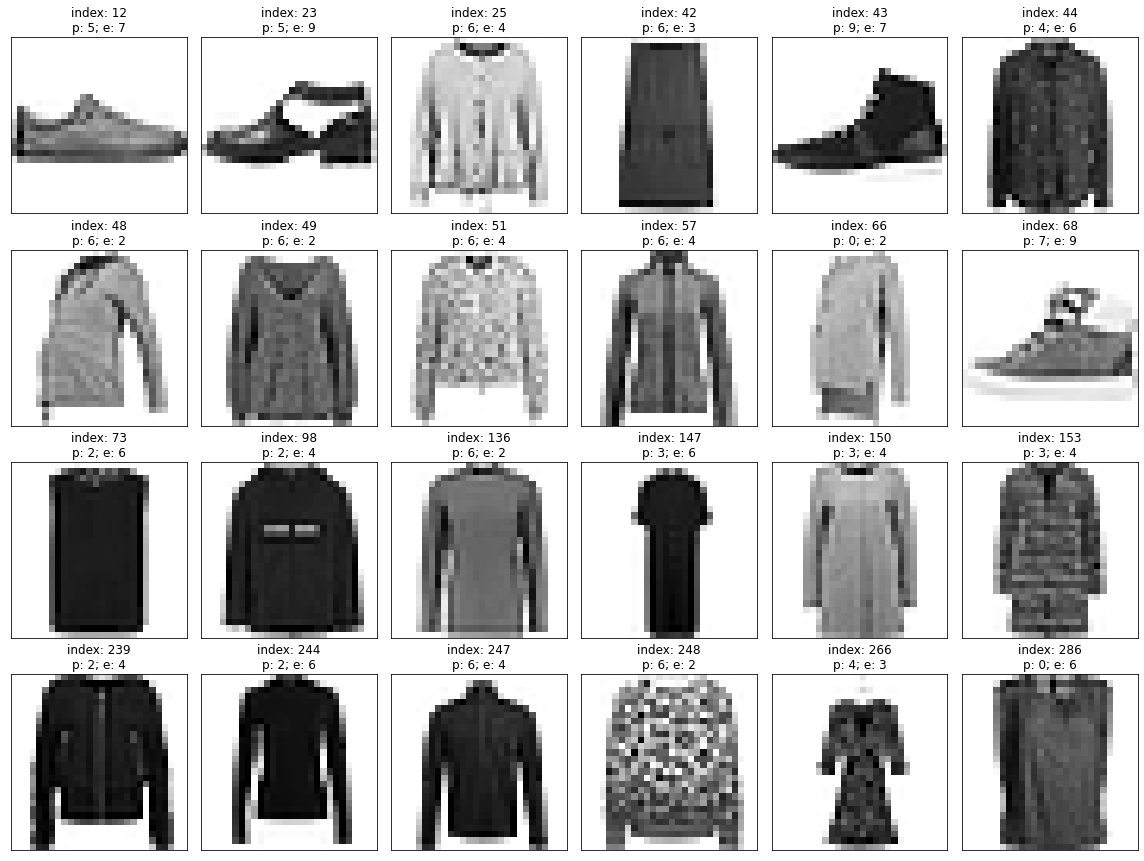

In [49]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [50]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [51]:
display_probabilities(predictions[286])

0: 39.8781657219%
1: 0.0967777392%
2: 3.8369920105%
3: 3.3543989062%
4: 0.8679991588%
5: 0.0593158649%
6: 32.3074787855%
7: 0.0227883720%
8: 19.5432364941%
9: 0.0328504335%


In [52]:
display_probabilities(predictions[325])

0: 0.5691896658%
1: 0.0019440608%
2: 24.2027714849%
3: 0.0307858922%
4: 8.3350554109%
5: 0.0057609137%
6: 66.8293654919%
7: 0.0088682740%
8: 0.0035409565%
9: 0.0127076259%


In [53]:
display_probabilities(predictions[316])

0: 0.0078992241%
1: 0.0420191325%
2: 0.0267878611%
3: 0.0737904455%
4: 0.0524783041%
5: 0.0414173468%
6: 0.0051027353%
7: 64.5345270634%
8: 0.0018089655%
9: 35.2141588926%
